# イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [2]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

## osを使用する場合

In [3]:
path = './img/' 
flist = os.listdir(path)

In [4]:
flist

['.ipynb_checkpoints',
 'cat_img.jpg',
 'cat_img2.jpg',
 'cat_img3.jpg',
 'cat_img4.jpg',
 'cat_img5.jpg',
 'cat_img6.jpg',
 'dog_img2.jpg',
 'dog_img3.jpg',
 'dog_img4.jpg',
 'dog_img5.jpg',
 'dog_img6.jpg',
 'dog_img_shiba.jpg']

## globを使用する場合

In [5]:
img_list = glob.glob(path + '/*' + ".jpg")

In [6]:
img_list 

['./img/cat_img.jpg',
 './img/cat_img2.jpg',
 './img/cat_img3.jpg',
 './img/cat_img4.jpg',
 './img/cat_img5.jpg',
 './img/cat_img6.jpg',
 './img/dog_img2.jpg',
 './img/dog_img3.jpg',
 './img/dog_img4.jpg',
 './img/dog_img5.jpg',
 './img/dog_img6.jpg',
 './img/dog_img_shiba.jpg']

# イメージのロード、配列化、リサイズ、データセット作成

In [7]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [8]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(6, 224, 224, 3)  cat_image:(6, 224, 224, 3)


# イメージの表示

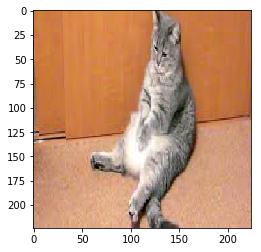

In [9]:
plt.imshow(cat_img_array[5])

In [10]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


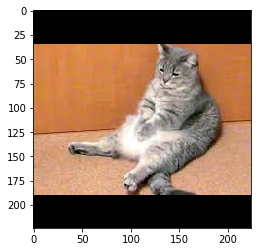

In [11]:
img = Image.open(img_list[5])

img_new = crop_center(img, 224, 224)

plt.imshow(img_new)

# openCVの色形式

In [12]:
import cv2

## グレースケール 

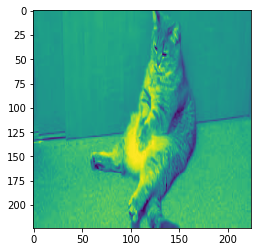

In [13]:
# 第二引数を0にするとグレースケールで読み込める
img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img_rgb = cv2.resize(img, (224, 224))

plt.imshow(img_rgb)

## BGRとRGB

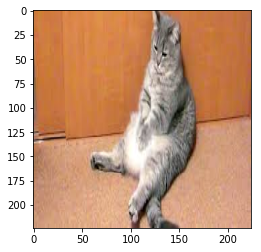

In [14]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGB

plt.imshow(img_rgb)

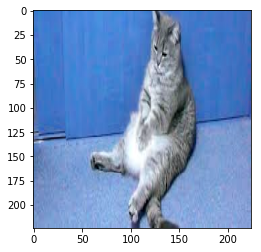

In [15]:
# BGR

plt.imshow(img)